<a href="https://colab.research.google.com/github/VangaSravani07/PRODIGY_TrackCode_02/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/content/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.groupby('Gender')[['Age','Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.1,59.2,51.5
Male,39.8,62.2,48.5


In [7]:
Gender_group = df.groupby('Gender').size().reset_index(name='Count')
Gender_group

,Gender,Count
0,Female,112
1,Male,88


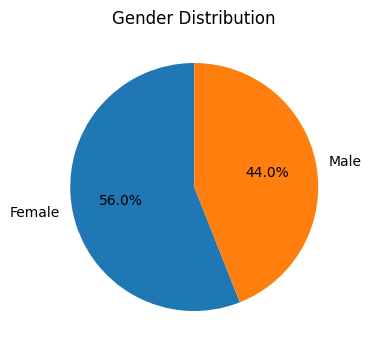

In [8]:
plt.figure(figsize= (4,8))
plt.pie(Gender_group['Count'],labels = Gender_group['Gender'], autopct= '%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

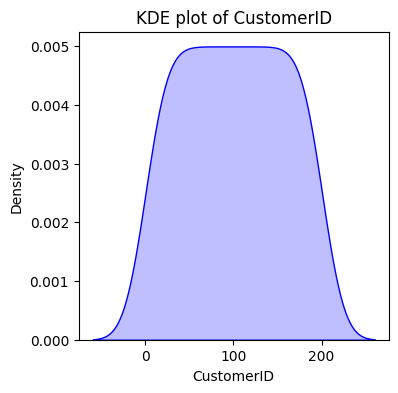

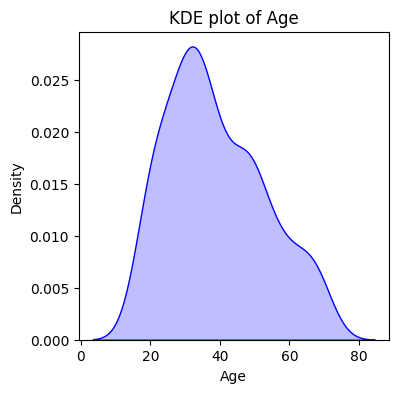

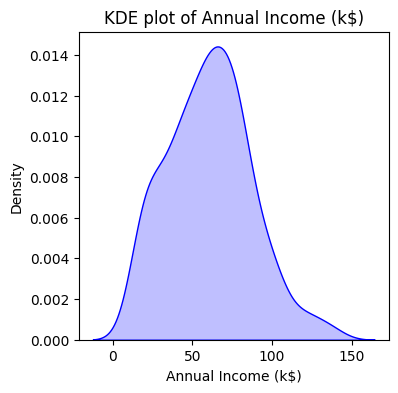

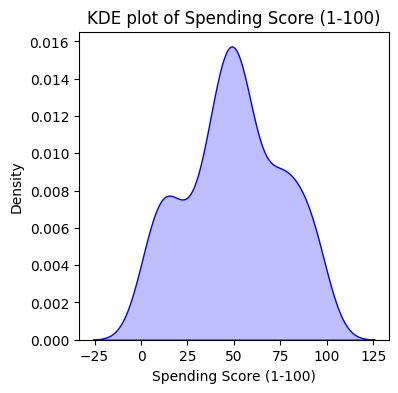

In [9]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize =(4,4))
        sns.kdeplot(df[column], shade=True, color='blue')
        plt.title(f'KDE plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show

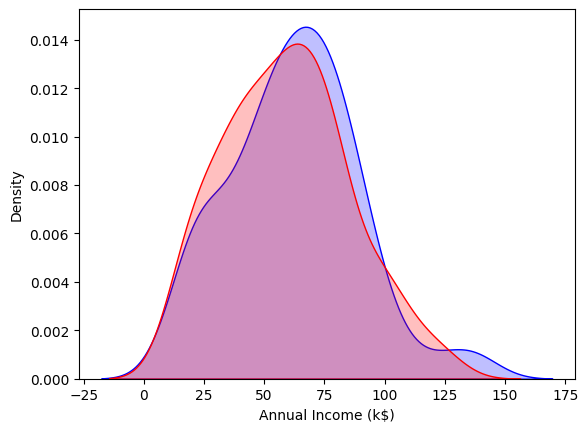

In [10]:
sns.kdeplot(df[df['Gender'] == 'Male']['Annual Income (k$)'], shade = True, color='blue', label ='Male')
sns.kdeplot(df[df['Gender'] == 'Female']['Annual Income (k$)'], shade = True, color='red', label ='Female')
plt.show()

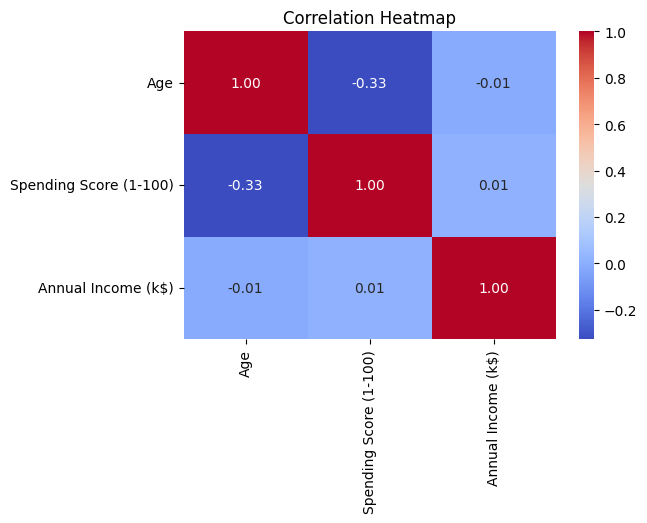

In [11]:
plt.figure(figsize = (6,4))
correlation_matrix = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].corr()
sns.heatmap(correlation_matrix, annot = True, cmap ='coolwarm', fmt= '.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

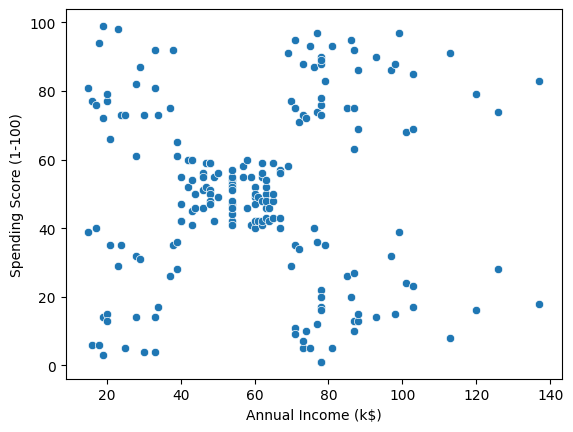

In [12]:
sns.scatterplot(data = df,x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

In [13]:
df.set_index('CustomerID', inplace = True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [14]:
from sklearn.metrics import silhouette_score

In [15]:
X = df.iloc[:,[2,3]]

In [16]:
silhouette_scores = []

In [17]:
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

print(silhouette_scores)

[np.float64(0.39564531743995546), np.float64(0.46761358158775435), np.float64(0.4937945814354117), np.float64(0.553931997444648), np.float64(0.5128405328004378), np.float64(0.5017174409749505), np.float64(0.4962769338093321), np.float64(0.45587414130065596), np.float64(0.4426214845978157)]


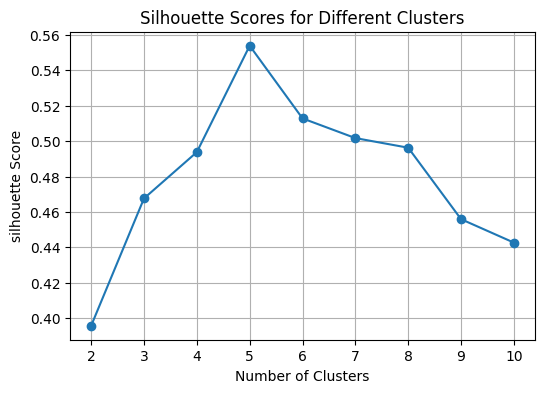

In [18]:
cluster_range = range(2, 11)

plt.figure(figsize=(6,4))
plt.plot(cluster_range, silhouette_scores, marker = 'o')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette Score')
plt.grid(True)
plt.show()

In [19]:
optimal_clusters = 5

kmeans_final = KMeans(n_clusters =optimal_clusters, init='k-means++', random_state=42)
Y = kmeans_final.fit_predict(X)

In [20]:
Y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [21]:
centroids = kmeans_final.cluster_centers_

In [22]:
for i, centroid in enumerate (centroids):
    print (f'Cluster {i}: {centroid}')

Cluster 0: [55.2962963  49.51851852]
Cluster 1: [86.53846154 82.12820513]
Cluster 2: [25.72727273 79.36363636]
Cluster 3: [88.2        17.11428571]
Cluster 4: [26.30434783 20.91304348]


In [23]:
cluster_labels ={}
for i, centroid in enumerate (centroids):
    income = centroid[0]
    spend = centroid[1]

    if income < 40:
        income_label = 'Low Income'
    elif 40 <= income <= 70:
        income_label = 'Moderate Income'
    else:
        income_label = 'Affluent'


    if spend < 40:
        spend_label = 'Low Spender'
    elif 40 <= spend <= 60:
        spend_label = 'Moderate Spender'
    else:
        spend_label = 'Luxury Shopper'

    cluster_labels[i] = f'{income_label}, {spend_label}'

In [24]:
cluster_labels

{0: 'Moderate Income, Moderate Spender',
 1: 'Affluent, Luxury Shopper',
 2: 'Low Income, Luxury Shopper',
 3: 'Affluent, Low Spender',
 4: 'Low Income, Low Spender'}

In [25]:
df['cluster'] = Y
df['cluster Name'] = df['cluster'].map(cluster_labels)

In [26]:
df['cluster Name']

,cluster Name
CustomerID,
1,"Low Income, Low Spender"
2,"Low Income, Luxury Shopper"
3,"Low Income, Low Spender"
4,"Low Income, Luxury Shopper"
5,"Low Income, Low Spender"
...,...
196,"Affluent, Luxury Shopper"
197,"Affluent, Low Spender"
198,"Affluent, Luxury Shopper"
